In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import plotly.io as pio
from plotly import *
import plotly.express as px
import plotly.graph_objects as go  
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize
from IPython.display import Image
import os,sys
import kaleido
from plotly.subplots import make_subplots
sys.path.insert(0,'../scripts/')
from process import *

In [15]:
telecom_df = pd.read_csv('../data/telecom.csv')
telecom_df.drop("Unnamed: 0",axis=1,inplace=True)
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))

In [16]:
telecom_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352",4/4/2019 12:01,770,4/25/2019 14:35,662,"1,823,652","208,201,448,079,117","33,664,962,239","35,521,209,507,511",9.16456699548519E+015,...,"15,854,611","2,501,332","8,198,936","9,656,251","278,082,303","14,344,150","171,744,450","8,814,393","36,749,741","308,879,636"
1,"13,114,483,482,878,900,224",4/9/2019 13:04,235,4/25/2019 8:15,606,"1,365,104","208,201,909,211,140","33,681,854,413","35,794,009,006,359",L77566A,...,"20,247,395","19,111,729","18,338,413","17,227,132","608,750,074","1,170,709","526,904,238","15,055,145","53,800,391","653,384,965"
2,"13,114,483,484,080,500,736",4/9/2019 17:42,1,4/25/2019 11:58,652,"1,361,762","208,200,314,458,056","33,760,627,129","35,281,510,359,387",D42335A,...,"19,725,661","14,699,576","17,587,794","6,163,408","229,584,621","395,630","410,692,588","4,215,763","27,883,638","279,807,335"
3,"13,114,483,485,442,799,616",4/10/2019 0:31,486,4/25/2019 7:36,171,"1,321,509","208,201,402,342,131","33,750,343,200","35,356,610,164,913",T21824A,...,"21,388,122","15,146,643","13,994,646","1,097,942","799,538,153","10,849,722","749,039,933","12,797,283","43,324,218","846,028,530"
4,"13,114,483,499,480,700,928",4/12/2019 20:10,565,4/25/2019 10:40,954,"1,089,009","208,201,401,415,120","33,699,795,932","35,407,009,745,539",D88865A,...,"15,259,380","18,962,873","17,124,581","415,218","527,707,248","3,529,801","550,709,500","13,910,322","38,542,814","569,138,589"




In this section, you’re expected to focus on network parameters like TCP retransmission, Round Trip Time (RTT), Throughput, and the customers’ device characteristics like the handset type to conduct a deep user experience analysis. The network parameters are all columns in the dataset.
Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):

. Average TCP retransmission

. Average RTT

. Handset type

. Average throughput



In [18]:
df = telecom_df[['MSISDN/Number','Handset Type','Avg RTT DL (ms)','Avg RTT UL (ms)',
                 'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',
                 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']]


In [ ]:
df['MSISDN/Number'].fillna(value=df['MSISDN/Number'].mean(), inplace=True)


In [22]:

df.head(10)


,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,"33,664,962,239",Samsung Galaxy A5 Sm-A520F,42,5,NaN,NaN,23,44
1,"33,681,854,413",Samsung Galaxy J5 (Sm-J530),65,5,NaN,NaN,16,26
2,"33,760,627,129",Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,6,9
3,"33,750,343,200",undefined,NaN,NaN,NaN,NaN,44,44
4,"33,699,795,932",Samsung Sm-G390F,NaN,NaN,NaN,NaN,6,9
5,"33,668,185,951",undefined,NaN,NaN,NaN,NaN,70,54
6,"33,665,368,271",Huawei Mate 20 Lite,102,5,NaN,NaN,22,38
7,"33,763,490,140",undefined,39,18,"19,520",NaN,"3,698",416
8,"33,698,743,617",Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,46,49
9,"33,659,219,748",Samsung Galaxy Note 8 (Sm-N950F Ds),97,7,"3,231,397","7,230","3,845","2,535"


filling missing value with mean

In [ ]:
df['Avg RTT DL (ms)'].fillna(value=df['Avg RTT DL (ms)'].mean(), inplace=True)
df['Avg Bearer TP DL (kbps)'].fillna(value=df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df['Avg Bearer TP UL (kbps)'].fillna(value=df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)
df['TCP DL Retrans. Vol (Bytes)'].fillna(value=df['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
df['TCP UL Retrans. Vol (Bytes)'].fillna(value=df['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)
df['Avg Bearer TP DL (kbps)'].fillna(value=df['Avg Bearer TP DL (kbps)'].mean(), inplace=True)
df['Avg Bearer TP UL (kbps)'].fillna(value=df['Avg Bearer TP UL (kbps)'].mean(), inplace=True)
df['Total_Avg_RTT'].fillna(value=df['Total_Avg_RTT'].mean(),inplace=True)


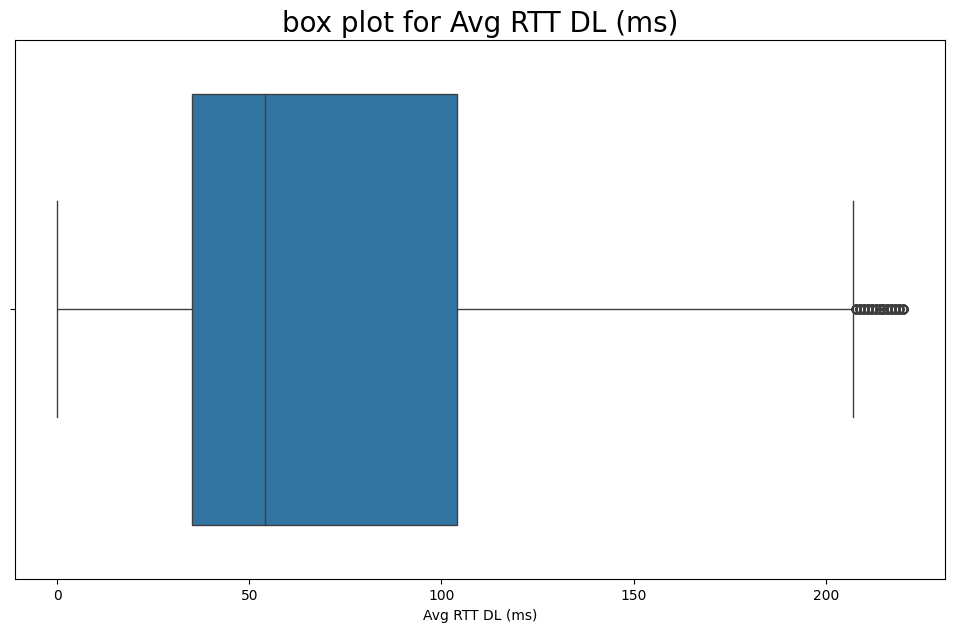

In [112]:

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Avg RTT DL (ms)')
plt.title("box plot for Avg RTT DL (ms)", size=20)
plt.show()




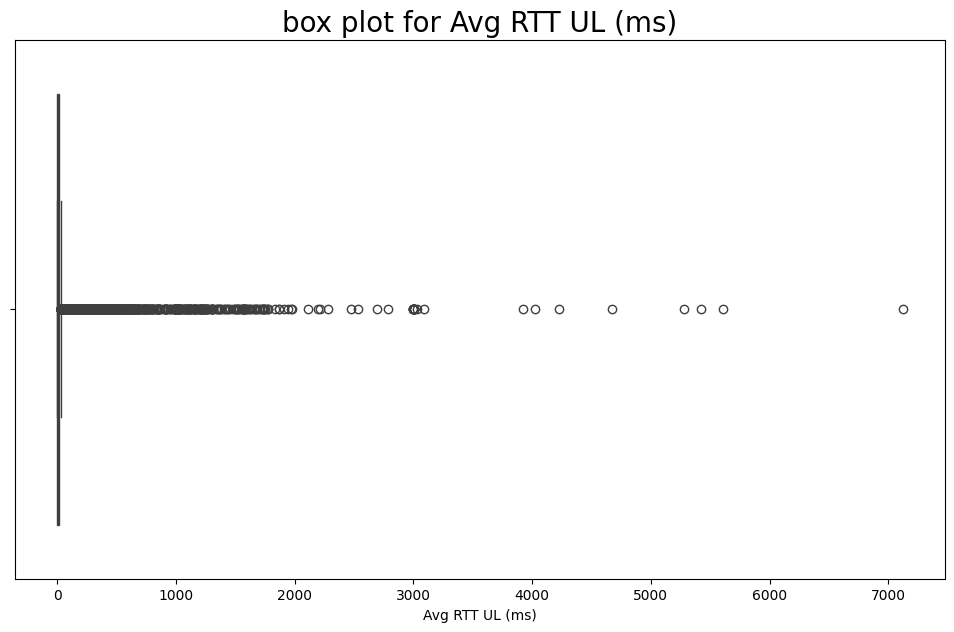

In [113]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Avg RTT UL (ms)')
plt.title("box plot for Avg RTT UL (ms)", size=20)
plt.show()

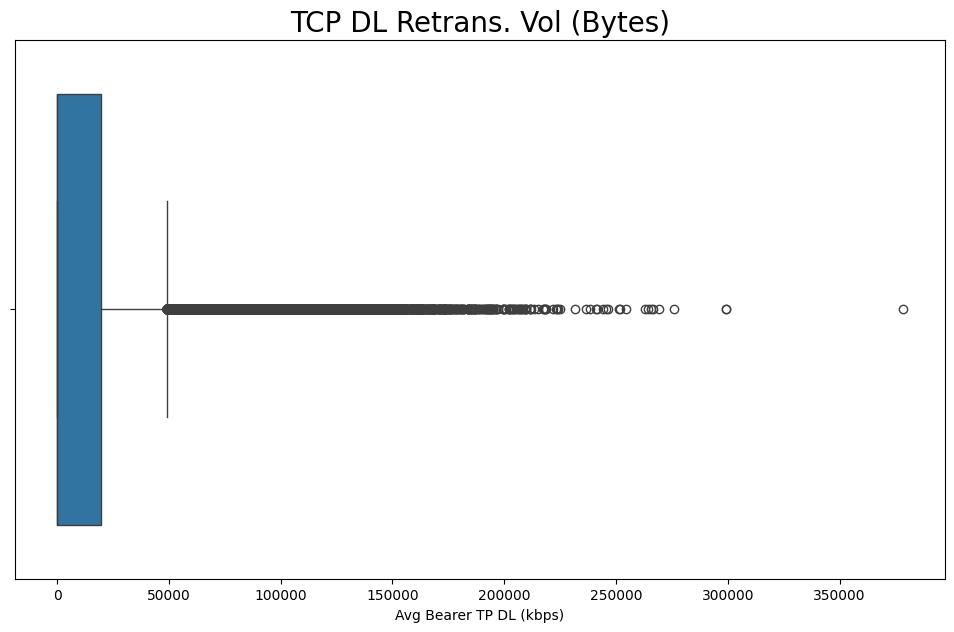

In [114]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Avg Bearer TP DL (kbps)')
plt.title("TCP DL Retrans. Vol (Bytes)", size=20)
plt.show()

In [ ]:
df['Avg RTT DL (ms)'] = np.where(df['Avg RTT DL (ms)'] > 220, 54, df['Avg RTT DL (ms)'])

In [116]:
#Printing the median and percentile of Avg RTT UL (ms)
df['Avg RTT UL (ms)'].describe()


count   122,189
mean         18
std          85
min           0
25%           2
50%           5
75%          15
max       7,120
Name: Avg RTT UL (ms), dtype: float64

In [117]:
df['Avg RTT DL (ms)'].describe()


count   150,001
mean         64
std          38
min           0
25%          35
50%          54
75%         104
max         220
Name: Avg RTT DL (ms), dtype: float64

In [118]:
avg_tp_uldl_columns = [
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)'
]
avg_tp_uldl = df[avg_tp_uldl_columns].sum()


<Axes: xlabel='Handset Type'>

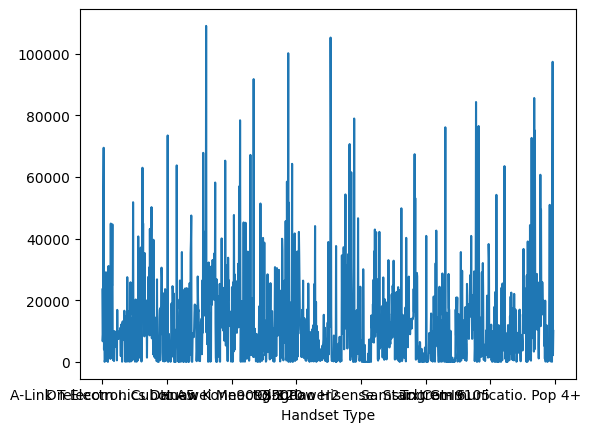

In [119]:
handsets_data = df.groupby('Handset Type')


handsets_tp = handsets_data[avg_tp_uldl_columns].mean().sum(axis=1)
handsets_tp.plot()



In [ ]:
df['Total_Avg_RTT'] = df['Avg RTT DL (ms)'] + \
                                      df['Avg RTT UL (ms)']

df['Total_Avg_Bearer_TP'] = df['Avg Bearer TP DL (kbps)'] + \
                                      df['Avg Bearer TP DL (kbps)']

df['Total_Avg_TCP'] = df['TCP DL Retrans. Vol (Bytes)'] + \
                                      df['TCP UL Retrans. Vol (Bytes)']

df['Total_Avg_RTT'].fillna(value=df['Total_Avg_RTT'].mean(),inplace=True)



Compute & list 10 of the top, bottom and most frequent:

.TCP values in the dataset.
 
.RTT values in the dataset.

. Throughput values in the dataset.



In [131]:
sorted_by_tcp = df.sort_values(
    'Total_Avg_TCP', ascending=False)
top_10 = sorted_by_tcp.head(10)['Total_Avg_TCP']
last_10 = sorted_by_tcp.tail(10)['Total_Avg_TCP']
most_10 = df['Total_Avg_TCP'].value_counts().head(10)

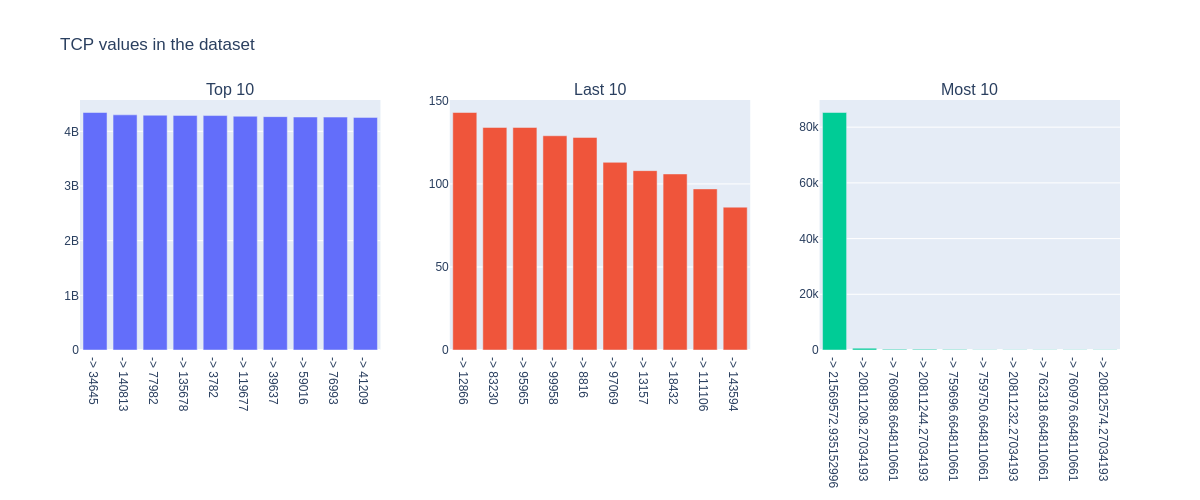

In [132]:
def mult_hist(sr, rows, cols, title_text, subplot_titles, interactive=False):
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)
    for i in range(rows):
        for j in range(cols):
            x = ["-> " + str(i) for i in sr[i+j].index]
            fig.add_trace(go.Bar(x=x, y=sr[i+j].values), row=i+1, col=j+1)
    fig.update_layout(showlegend=False, title_text=title_text)
    if(interactive):
        fig.show()
    else:
        return Image(pio.to_image(fig, format='png', width=1200))
mult_hist([top_10, last_10, most_10], 1,
          3, "TCP values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

In [133]:
sorted_by_RTT = df.sort_values(
    'Total_Avg_RTT', ascending=False)
top_10 = sorted_by_RTT.head(10)['Total_Avg_RTT']
last_10 = sorted_by_RTT.tail(10)['Total_Avg_RTT']
most_10 = df['Total_Avg_RTT'].value_counts().head(10)


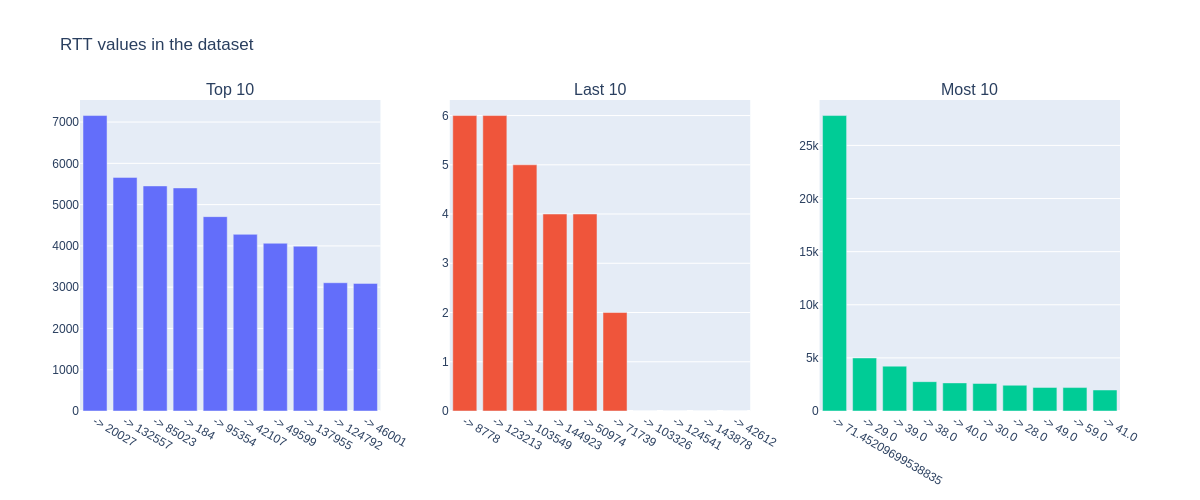

In [134]:


mult_hist([top_10, last_10, most_10], 1,
          3, "RTT values in the dataset", ['Top 10', 'Last 10', 'Most 10'])


In [135]:
sorted_by_Bearer_TP = df.sort_values(
    'Total_Avg_Bearer_TP', ascending=False)
top_10 = sorted_by_Bearer_TP.head(10)['Total_Avg_Bearer_TP']
last_10 = sorted_by_Bearer_TP.tail(10)['Total_Avg_Bearer_TP']
most_10 = df['Total_Avg_Bearer_TP'].value_counts().head(10)

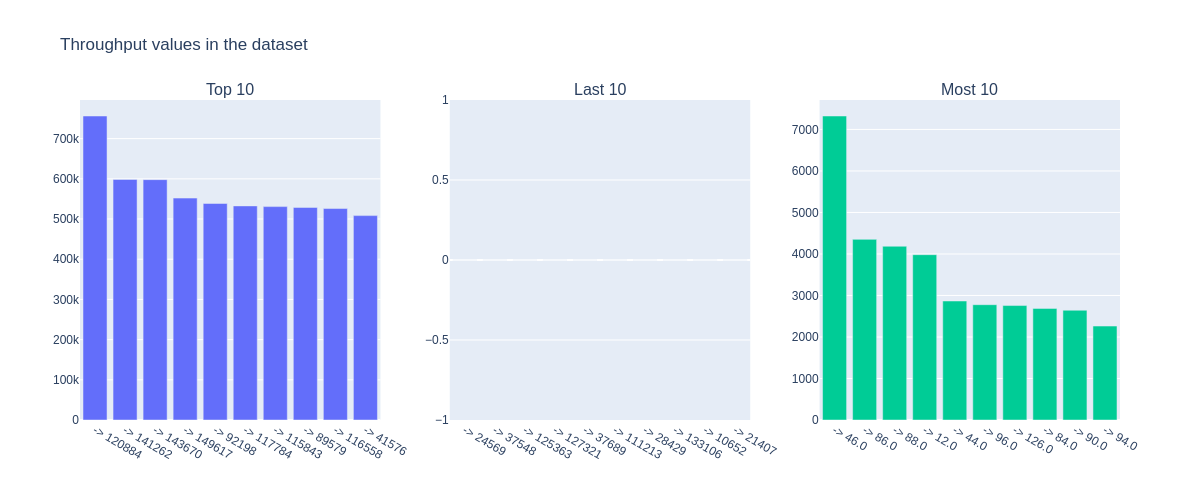

In [136]:
mult_hist([top_10, last_10, most_10, top_10], 1,
          3, "Throughput values in the dataset", ['Top 10', 'Last 10', 'Most 10'])


Compute & report:

The distribution of the average throughput per handset type and provide interpretation for your findings.

The average TCP retransmission view per handset type and provide interpretation for your findings.

In [138]:
handset_type_agg = df.groupby('Handset Type').agg(
    {'Total_Avg_Bearer_TP': 'mean', 'Total_Avg_TCP': 'mean'})
handset_type_agg.head()



,Total_Avg_Bearer_TP,Total_Avg_TCP
Handset Type,,
A-Link Telecom I. Cubot A5,"46,368","21,569,573"
A-Link Telecom I. Cubot Note Plus,"13,054","616,213"
A-Link Telecom I. Cubot Note S,"17,030","41,411,731"
A-Link Telecom I. Cubot Nova,"111,334","137,170"
A-Link Telecom I. Cubot Power,"138,252","8,041"


/tmp/ipykernel_74217/1996917590.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




,Total_Avg_Bearer_TP
count,"1,396"
mean,"22,654"
std,"27,302"
min,0
25%,"2,096"
50%,"15,449"
75%,"31,590"
max,"209,338"


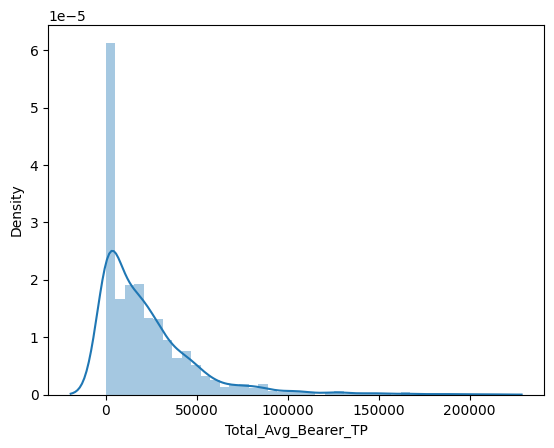

In [139]:
sorted_by_tp = handset_type_agg.sort_values('Total_Avg_Bearer_TP', ascending=False)
top_tp = sorted_by_tp['Total_Avg_Bearer_TP']

sns.distplot(top_tp)
pd.DataFrame(top_tp.describe()) 

 perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

In [140]:
metrics = df[[
    "Total_Avg_RTT",
    "Total_Avg_Bearer_TP",
    "Total_Avg_TCP"]].copy()
metrics.head()

,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,47,46,"21,569,573"
1,70,32,"21,569,573"
2,71,12,"21,569,573"
3,71,88,"21,569,573"
4,71,12,"21,569,573"


In [144]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(metrics)
pd.DataFrame(scaled_array).head()

,0,1,2
0,-0,-1,0
1,-0,-1,0
2,0,-1,0
3,0,-1,0
4,0,-1,0


In [145]:

data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)


,0,1,2
0,-0,-1,0
1,-0,-1,0
2,0,-1,0
3,0,-1,0
4,0,-1,0


In [147]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

/home/brook/.local/share/virtualenvs/brook-XTTTytiq/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

In [148]:
df.insert(0, 'Cluster', kmeans.labels_)
df.head(10)


,Cluster,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,1,"33,664,962,239",Samsung Galaxy A5 Sm-A520F,42,5,"20,809,914","759,659",23,44,47,46,"21,569,573"
1,1,"33,681,854,413",Samsung Galaxy J5 (Sm-J530),65,5,"20,809,914","759,659",16,26,70,32,"21,569,573"
2,1,"33,760,627,129",Samsung Galaxy A8 (2018),110,NaN,"20,809,914","759,659",6,9,71,12,"21,569,573"
3,1,"33,750,343,200",undefined,110,NaN,"20,809,914","759,659",44,44,71,88,"21,569,573"
4,1,"33,699,795,932",Samsung Sm-G390F,110,NaN,"20,809,914","759,659",6,9,71,12,"21,569,573"
5,1,"33,668,185,951",undefined,110,NaN,"20,809,914","759,659",70,54,71,140,"21,569,573"
6,2,"33,665,368,271",Huawei Mate 20 Lite,102,5,"20,809,914","759,659",22,38,107,44,"21,569,573"
7,1,"33,763,490,140",undefined,39,18,"19,520","759,659","3,698",416,57,"7,396","779,179"
8,1,"33,698,743,617",Samsung Galaxy A8 (2018),110,NaN,"20,809,914","759,659",46,49,71,92,"21,569,573"
9,2,"33,659,219,748",Samsung Galaxy Note 8 (Sm-N950F Ds),97,7,"3,231,397","7,230","3,845","2,535",104,"7,690","3,238,627"


In [ ]:
import pickle
with open("../models/user_exp.pkl", "wb") as f:
    pickle.dump(kmeans, f)